<table>
 <tr align=left><td><img align=left src="https://mirrors.creativecommons.org/presskit/buttons/80x15/png/by.png">
 <td>This notebook is provided under the Creative Commons Attribution license, CC-BY 4.0. All code is made available under MIT License (c) Arash Sarshar.</td>
 <td> </td>
</table>

## Some ground rules for writing good responses in your assignments

* Make sure that you provide ample comments to communicate what you are trying to do clearly. Do not assume that anyone reading the code would immediately  understand the context.
* If you need to create new variables, think about naming them in descriptive ways.
* Each and every output should be reproducible. If you are creating a plot, make sure you include the code for that plot. 
* Cite your references, including AI ones.


## Let's load the lemon picture again

In [1]:
import numpy as np
from numpy.linalg import *
from PIL import Image
import matplotlib.pyplot as plt

PIL stands for Python Imaging Library, and it provides the necessary tools and functions for handling images in Python. It is used for image processing, manipulation, and analysis.

In [2]:
image = np.array(Image.open('../../Images/lemon.jpeg'))

(100, 100, 3)
(100, 100)


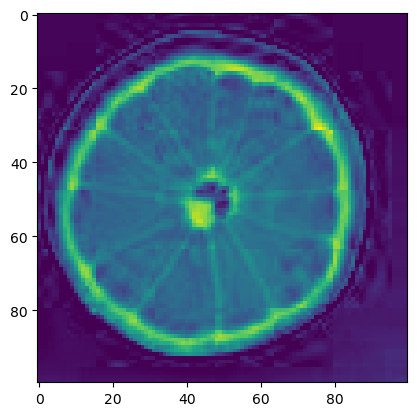

In [9]:
print(image.shape)
img_single_channel=image[:,:,-1]
print(img_single_channel.shape)
plt.imshow(img_single_channel)

## Part 1

Write a block of commands that does the following.  

1. Print the shape of the image 
1. Create a new variable called `img_single_channel` that is equivalent to __the last color channel__ of `image`
3. Print the shape of `img_single_channel` to check that it has the same number of pixels as the original image
4. Use `plt.imshow` to plot  `img_single_channel`





## Part 2

Write a block of commands that does the following.  

1. Create a new variable called `img_average_channel` that is equivalent to __the average of all three color channels__ of `image`
3. Print the shape of `img_average_channel` to check that it has the same number of pixels as the original image
4. Use `plt.imshow` to plot  the original image in `image`, compare the result with the result of `Part 1`, and comment on the differences and which one you would say is better

(100, 100)


Text(0.5, 1.0, 'Average Channel Image')

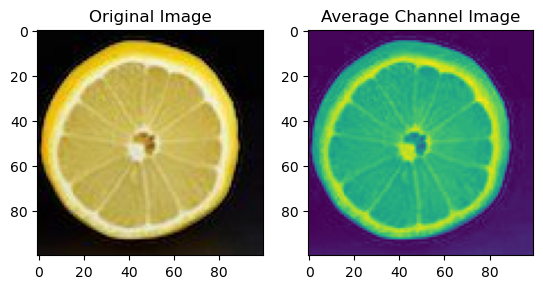

In [27]:
img_average_channel = np.mean(image, axis=-1).astype(np.uint8)
print(img_average_channel.shape)
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("Original Image")
plt.subplot(1, 2, 2)
plt.imshow(img_average_channel)  
plt.title("Average Channel Image")

3.The img_single_channel from Part 1 only has information from one color channel (for example, just the red, green, or blue channel), therefore it lacks color information. In contrast, the original picture is a full-color image with all the details and colors.
A grayscale version of the original image, produced by averaging the three color channels, is represented by img_average_channel in Part 2. Because it mixes data from all color channels, it maintains more information than img_single_channel.The original image is better.

## Part 3

1. Describe what an identity matrix is. What does multiplying with an identity matrix do?
1. Create an identity matrix called `identity_matrix` that has the same size as `img_average_channel`.
2. Print a random row out of `identity_matrix` and describe your observations.

1.An identity matrix is a square matrix with zeros everywhere else and ones along the major diagonal. Or to put it another way, it's a unique form of square matrix where all of the elements are zero except for the ones on the major diagonal, which are equal to one. 


In [15]:
identity_matrix = np.eye(*img_average_channel.shape)
random_row_index = np.random.randint(0, img_average_channel.shape[0])
random_row = identity_matrix[random_row_index, :]
print("Random Row from Identity Matrix:")
print(random_row)

Random Row from Identity Matrix:
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 0.]


In that row i can see only zeros all over except for one number that is "1".

## Part 4

We are going to use `identity_matrix` to scramble the rows and columns of `img_average_channel`. 

1. First, create a numpy array that contains the numbers $0,1, \cdots, N$ where $N$ is the number of rows in the image.

2. Use `numpy.random.shuffle` to shuffle the indices. Call the shuffled array, `rows`

4. Print `rows` and inspect the elements.

In [17]:
rows = np.arange(img_average_channel.shape[0])
print(rows)
np.random.shuffle(rows)
print("Shuffled Rows:")
print(rows)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]
Shuffled Rows:
[51 65 69 84 57 10 22 30 54 96 95 34 50 16  2 29 92 39 48 37 75 91  1 86
 99  9 24 90 70 80  6 36 43 89 28 12 13 23 32 68 61 87 67 33 83 55  4 18
  3 42 94 41 93 52 64 31 14 45 88 27 46 25 77 19  8 26  7 60 81 78 15 20
 49 35 74 59 82 85 47 53 40  0 38 66 97 11 71 44 98 62 58 63 72 76 17 56
 79 21 73  5]


## Part 5

1. Use your array of random row indices to create a new matrix `T` from `identity_matrix`. Overall, `T` has the same elements as `identity_matrix`, but the order of the rows of `T` should be according to the variable `rows`
2. Take a moment to think about what we are doing here. Describe in your own words what matrix `T` is.
3. Sanity check, print the shape of `T` and make sure it is the same size as `identity_matrix` and `img_average_channel`. If you need to,  reshape it to have the same size.


In [19]:
T = identity_matrix[rows]
if T.shape != img_average_channel.shape:
    T = T.reshape(img_average_channel.shape)
    
print("Shape of T after sanity check:", T.shape)

Shape of T after sanity check: (100, 100)


2.In simple terms, matrix T is a modified version of the identity matrix, where we have scrambled the order of its rows.

## Part 6

1. Matrix multiply `T` and `img_average_channel` and store the result in `transformed_image`. Check the shape of the result.
2. Plot `transformed_image` and describe the pattern you see. 
3. Think about what each dot product in the matrix multiplication is doing. Describe in your own words what this transformation is doing to the original image. 

Shape of Transformed Image: (100, 100)


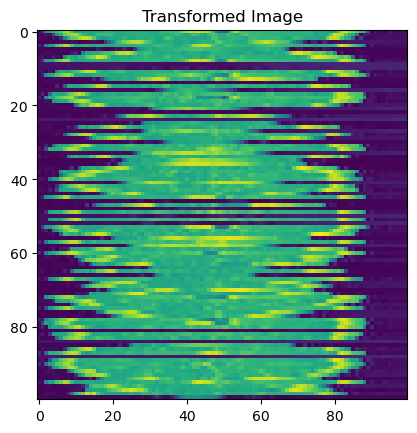

In [20]:
transformed_image = np.dot(T, img_average_channel)
print("Shape of Transformed Image:", transformed_image.shape)
plt.imshow(transformed_image)
plt.title("Transformed Image")
plt.show()

3.The pattern in the "Transformed Image" results from the operation of shuffling the rows of the identity matrix and then using this shuffled order to weigh and rearrange the rows in the original image represented by `img_average_channel`. Each dot product in the matrix multiplication effectively selects a particular row from the shuffled identity matrix and applies it as a weight to the corresponding row in `img_average_channel`. The outcome is a permutation of the original image's rows, leading to a visually rearranged version. This transformation can create interesting visual effects, especially when the shuffled row order introduces new patterns or structures within the image. The specific impact depends on the nature of the original image and the random shuffling applied to the rows.

## Part 7

1. We now want to retrieve the original image. Is matrix `T` invertible? How would you show that it is invertible?
2. Compute the inverse and store the matrix in `Tinv`.
3. Perform the inverse of the scrambling operation and plot the result to show that you retrieved the original image.

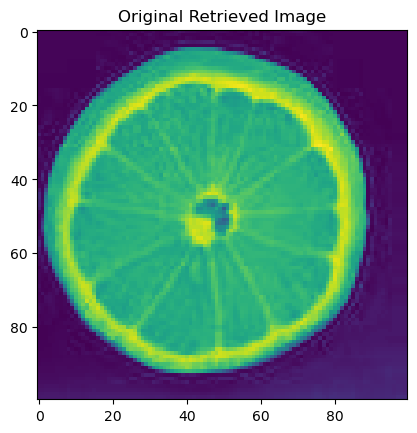

In [22]:
determinant_T = np.linalg.det(T)
is_invertible = determinant_T != 0
if is_invertible:
    Tinv = np.linalg.inv(T)
    original_retrieved_image = np.dot(Tinv, transformed_image)
    plt.imshow(original_retrieved_image)
    plt.title("Original Retrieved Image")
    plt.show()
else:
    print("Matrix T is not invertible, and the original image cannot be retrieved.")


## Part 8: Extra Points

* We want to perform the same operations but on the columns of the original image. How would you do the matrix algebra? Plot the scrambled image for the proof of concept.


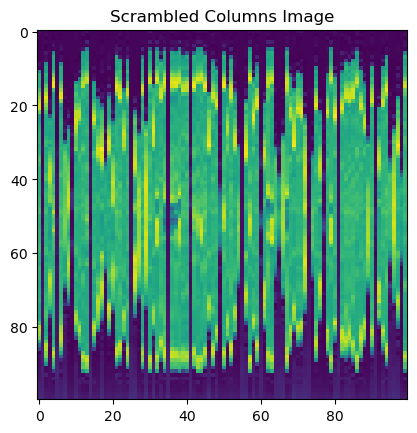

In [24]:
original_image_transposed = np.transpose(img_average_channel)
num_columns = original_image_transposed.shape[0]
columns = np.arange(num_columns)
np.random.shuffle(columns)
T_columns = np.eye(num_columns)[columns]
transformed_image_columns = np.dot(T_columns, original_image_transposed)
transformed_image_columns = np.transpose(transformed_image_columns)
plt.imshow(transformed_image_columns)
plt.title("Scrambled Columns Image")
plt.show()

## Extra Points

* Now can you perform the scrambling on __both the columns and rows__ of the original image?  Write the code and plot the scrambled image. Then invert the operations and show that you can recover the original image. 

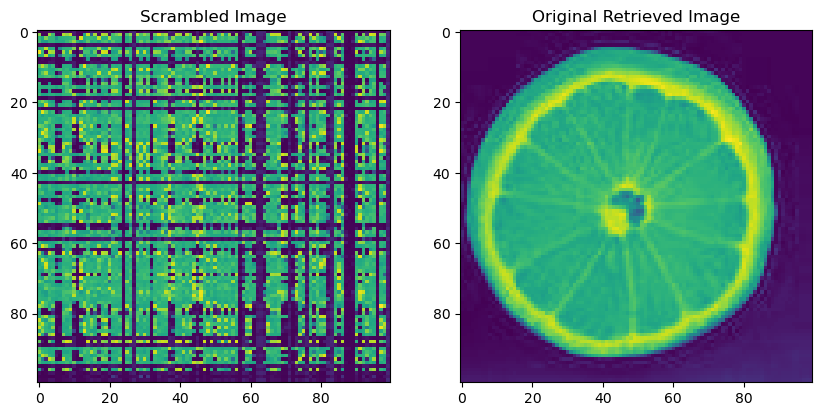

In [26]:
import numpy as np
import matplotlib.pyplot as plt
original_image_transposed = np.transpose(img_average_channel)
num_rows, num_columns = original_image_transposed.shape
row_order = np.arange(num_rows)
col_order = np.arange(num_columns)
np.random.shuffle(row_order)
np.random.shuffle(col_order)
T_rows = np.eye(num_rows)[row_order]
T_cols = np.eye(num_columns)[col_order]
transformed_image = np.dot(np.dot(T_rows, original_image_transposed), T_cols)
T_rows_inv = np.linalg.inv(T_rows)
T_cols_inv = np.linalg.inv(T_cols)
original_retrieved_image = np.dot(np.dot(T_rows_inv, transformed_image), T_cols_inv)
original_retrieved_image = np.transpose(original_retrieved_image)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(transformed_image)
plt.title("Scrambled Image")
plt.subplot(1, 2, 2)
plt.imshow(original_retrieved_image)
plt.title("Original Retrieved Image")
plt.show()